In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
income = pd.read_csv("/content/income.csv")

In [ ]:
data = income.copy()

# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


 25%, 50% and 75% is zero for capital gains because very few people invest in properties or stocks.

 capital gains means profit made after selling an asset, only 25% of capital gains is greater than zero

 or

 the stats show that 75% people have 0 capital gains.


for categorical variables, "o" represents object.

In [ ]:
data.describe(include = "O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


"top" is the most frequently occuring category.

In [ ]:
data["JobType"].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

"?" represents null.

In [ ]:
data["occupation"].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [ ]:
np.unique(data["occupation"])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [ ]:
np.unique(data["JobType"])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

we can notice that there is a blank space before the question mark

so now removing the na values

In [ ]:
data =pd.read_csv("/content/income.csv", na_values = [" ?"])

The code missing = data[data.isnull().any(axis=1)] creates a new DataFrame missing that contains all rows from the DataFrame data which have at least one missing (null) value.

In [ ]:
missing = data[data.isnull().any(axis=1)]

In [ ]:
data.shape

(31978, 13)

In [ ]:
missing.shape

(1816, 13)

there are 1816 rows with at least one missing value

once you download the missing dataframe and investigate you will find that whenever the "job type" is Never-worked the occuoation is Nan.

In [ ]:
from google.colab import data_table

# Display the 'missing' DataFrame in a scrollable table
#data_table.DataTable(missing)


removing missing values

In [ ]:
data2  = data.dropna(axis= 0)

correlation plot shows that the numeric features are not correlated.

In [ ]:
# Select only numeric columns
numeric_data =data2.select_dtypes(include = [float, int])

# Calculate the correlation matrix
correlation = numeric_data.corr()
correlation


,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


let us look at the gender proportion , not explained why?



In [ ]:
gender = pd.crosstab( index = data2["gender"],
                     columns = "counts",
                      normalize = True)
gender

col_0,counts
gender,
Female,0.324315
Male,0.675685


the population consists of 67% male and 37% female. Now let us check how salaray status varies with gender.

In [ ]:
gender_salary = pd.crosstab( index = data2["gender"],
                     columns = data2["SalStat"],
                             margins = True,
                             normalize = 'index')
gender_salary

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


it can be seen that 31 %males earn more than 50, 000 while for the females the % is only 11%. But the difference is not huge so this feature can be dropped.
**bold text**

In [ ]:
country_salary = pd.crosstab( index = data2["nativecountry"],
                     columns = data2["SalStat"],
                             margins = True,
                             normalize = 'index')
country_salary

SalStat,"greater than 50,000","less than or equal to 50,000"
nativecountry,,
Cambodia,0.388889,0.611111
Canada,0.336449,0.663551
China,0.294118,0.705882
Columbia,0.035714,0.964286
Cuba,0.271739,0.728261
Dominican-Republic,0.029851,0.970149
Ecuador,0.148148,0.851852
El-Salvador,0.090000,0.910000
England,0.348837,0.651163


**there is not much variation in the data, for almost all countries most people make less than 50k. So this feature can be dropped.**

now let us look at the salary wise distribution of population

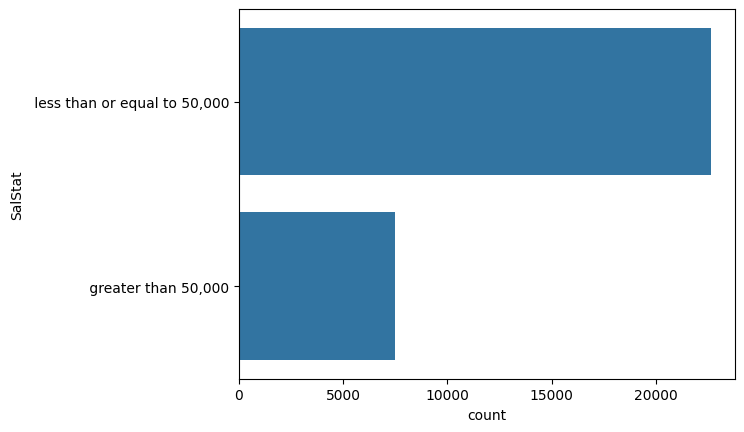

In [ ]:
salStat =sns.countplot(data2["SalStat"])

so most people make less than 50k

checking frequency distribution of age variable

<ipython-input-405-4de9d27d3b52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data2["age"], bins = 10 , kde = False )


<Axes: xlabel='age'>

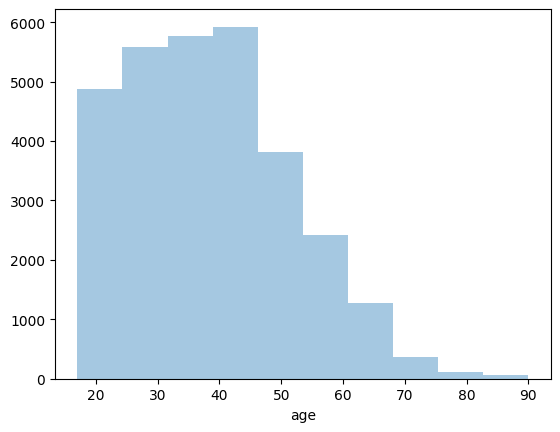

In [ ]:
sns.distplot( data2["age"], bins = 10 , kde = False )

 people  between 25 and 45 are high in frequency.

**to do bi-variate analysis of how salary is varying changing across age, we can do a bi-variate analysis.
For this we can make a box plot.
This feature is important as the SalStat is clearly changing with the age.**

<Axes: xlabel='age'>

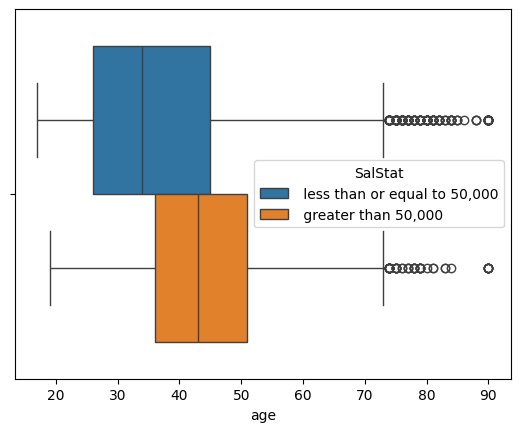

In [ ]:
sns.boxplot(x='age', hue='SalStat', data=data2)

In [ ]:
import matplotlib.pyplot as plt

making a bar graph between salary status and the JobType

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ' Private'),
  Text(1, 0, ' Federal-gov'),
  Text(2, 0, ' Self-emp-inc'),
  Text(3, 0, ' Self-emp-not-inc'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' State-gov'),
  Text(6, 0, ' Without-pay')])

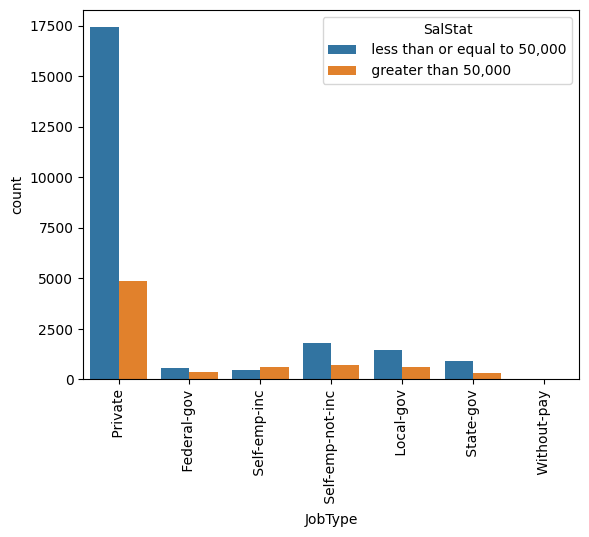

In [ ]:
sns.countplot(x='JobType', hue='SalStat', data=data2)
plt.xticks(rotation=90)

SalStat vs JobType proportions.

In [ ]:
  table = pd.crosstab(data2['JobType'], data2['SalStat'], normalize='index') * 100
  print(table)

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 Federal-gov                  38.706257                      61.293743
 Local-gov                    29.462990                      70.537010
 Private                      21.879207                      78.120793
 Self-emp-inc                 55.865922                      44.134078
 Self-emp-not-inc             28.571429                      71.428571
 State-gov                    26.896013                      73.103987
 Without-pay                   0.000000                     100.000000


**we can see that the salary proprtions for the "Self-emp-inc" are more or less the same, hence all except one category in the JobType variable has different SalStat.**

**Also the bar graph shows us that the count for Self-emp-inc is very low hence we should not consider it. Only for private the count is high, however for private also 78%people ern less than 50k, so we can say that most people regardless of their occupation make less than 50k hence this feature is not imp.**



salStat vs Education

In [ ]:
ed = pd.crosstab(data2['EdType'], data2['SalStat'], normalize='index') * 100
print(ed)

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      7.195122                      92.804878
 11th                      5.629771                      94.370229
 12th                      7.692308                      92.307692
 1st-4th                   3.973510                      96.026490
 5th-6th                   4.166667                      95.833333
 7th-8th                   6.283662                      93.716338
 9th                       5.494505                      94.505495
 Assoc-acdm               25.396825                      74.603175
 Assoc-voc                26.319816                      73.680184
 Bachelors                42.149088                      57.850912
 Doctorate                74.666667                      25.333333
 HS-grad                  16.432927                      83.567073
 Masters                  56.422864                      43.57

**we can see the people with bachelors, masters and doctorate earm more than 50k. SO this is an imp variable in helping us avoid misuse of subsidies.**

In [ ]:
table = pd.crosstab(data2['race'], data2['SalStat'], normalize='index') * 100
print(table)
table = pd.crosstab(data2['maritalstatus'], data2['SalStat'], normalize='index') * 100
print(table)

SalStat               greater than 50,000   less than or equal to 50,000
race                                                                    
 Amer-Indian-Eskimo             11.888112                      88.111888
 Asian-Pac-Islander             27.709497                      72.290503
 Black                          12.992545                      87.007455
 Other                           9.090909                      90.909091
 White                          26.371804                      73.628196
SalStat                  greater than 50,000   less than or equal to 50,000
maritalstatus                                                              
 Divorced                          10.726151                      89.273849
 Married-AF-spouse                 47.619048                      52.380952
 Married-civ-spouse                45.495912                      54.504088
 Married-spouse-absent              8.378378                      91.621622
 Never-married                   

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ' Divorced'),
  Text(1, 0, ' Never-married'),
  Text(2, 0, ' Married-civ-spouse'),
  Text(3, 0, ' Widowed'),
  Text(4, 0, ' Married-spouse-absent'),
  Text(5, 0, ' Separated'),
  Text(6, 0, ' Married-AF-spouse')])

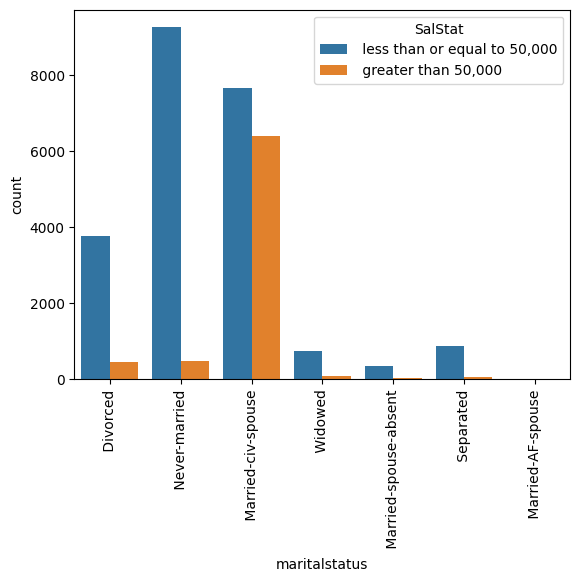

In [ ]:
sns.countplot(x='maritalstatus', hue='SalStat', data=data2)
plt.xticks(rotation=90)

**for race the , people belongign to all categories lie in the less than or equal to 50k status. So these features can be dropped while building the model**

**But for marital status there are significant no. of people in the Married-civ-spouse category that make both less than and greater than 50k, hence this feature is imp and cannot be dropped.**

In [ ]:
  table = pd.crosstab(data2['occupation'], data2['SalStat'], normalize='index') * 100
  print(table)

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                  13.383499                      86.616501
 Armed-Forces                  11.111111                      88.888889
 Craft-repair                  22.531017                      77.468983
 Exec-managerial               48.522044                      51.477956
 Farming-fishing               11.627907                      88.372093
 Handlers-cleaners              6.148148                      93.851852
 Machine-op-inspct             12.461851                      87.538149
 Other-service                  4.109589                      95.890411
 Priv-house-serv                0.699301                      99.300699
 Prof-specialty                44.848935                      55.151065
 Protective-serv               32.608696                      67.391304
 Sales                         27.064732                      72

**Exec-managerial and Prof-specialty occupations have almost eqaul no. of people in both categorie but for the remaining occupations most population makes less than 50k, hence this cannot be an imp variable that can help us in avoiding mis-use of subsidies, but first we must check th population of the people having these two occupations that is Exec-managerial and Prof-specialty.**

****

**the population of the people having these two occupations that is Exec-managerial and Prof-specialty is high so this feature cannot be ignored. If the number was low then we could have said that,  people with all occupations make less than 50k so occupation feature is not imp but that is not the case here. **

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Armed-Forces'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Craft-repair'),
  Text(4, 0, ' Sales'),
  Text(5, 0, ' Exec-managerial'),
  Text(6, 0, ' Machine-op-inspct'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Other-service'),
  Text(11, 0, ' Handlers-cleaners'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv')])

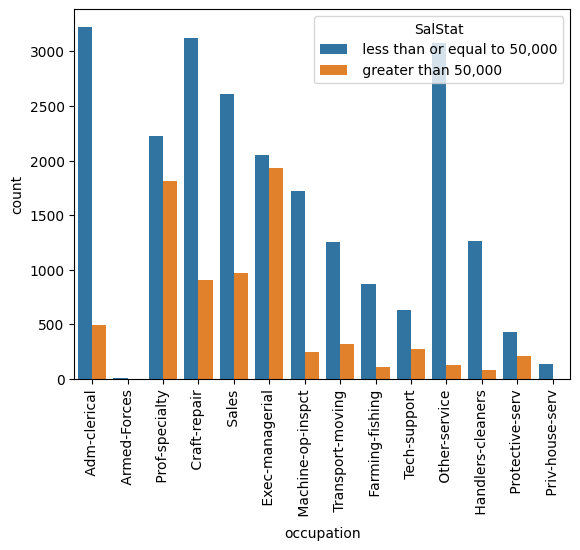

In [ ]:
sns.countplot(x='occupation', hue='SalStat', data=data2)
plt.xticks(rotation=90)

<Axes: xlabel='hoursperweek'>

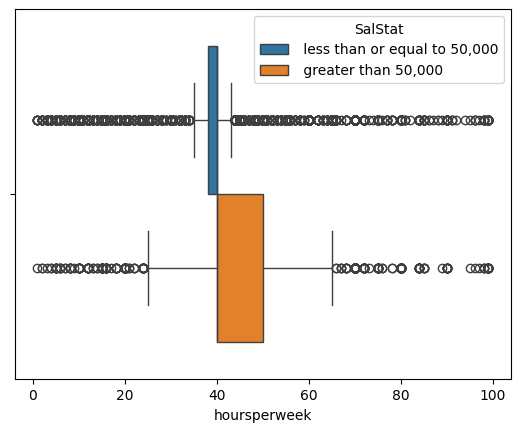

In [ ]:
sns.boxplot(x='hoursperweek', hue='SalStat', data=data2)

**so we can see that the peopl who work more than 50 hours per week are more likely to make 50k dollars, so this variable is also imp.**

# checking for capital gain and capital loss.

<ipython-input-416-61b1df9b6f2b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data2["capitalgain"], bins = 100 , kde = False )


<Axes: xlabel='capitalgain'>

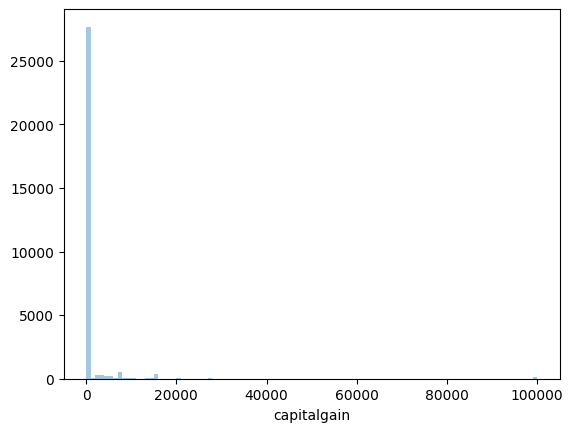

In [ ]:
sns.distplot( data2["capitalgain"], bins = 100 , kde = False )

<ipython-input-417-b35c31354d2c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data2["capitalloss"], bins = 100 , kde = False )


<Axes: xlabel='capitalloss'>

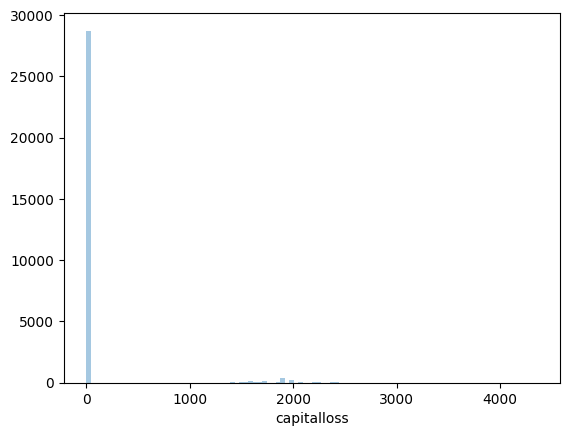

In [ ]:
sns.distplot( data2["capitalloss"], bins = 100 , kde = False )

<ipython-input-418-f7542ecaf3e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].astype('category')


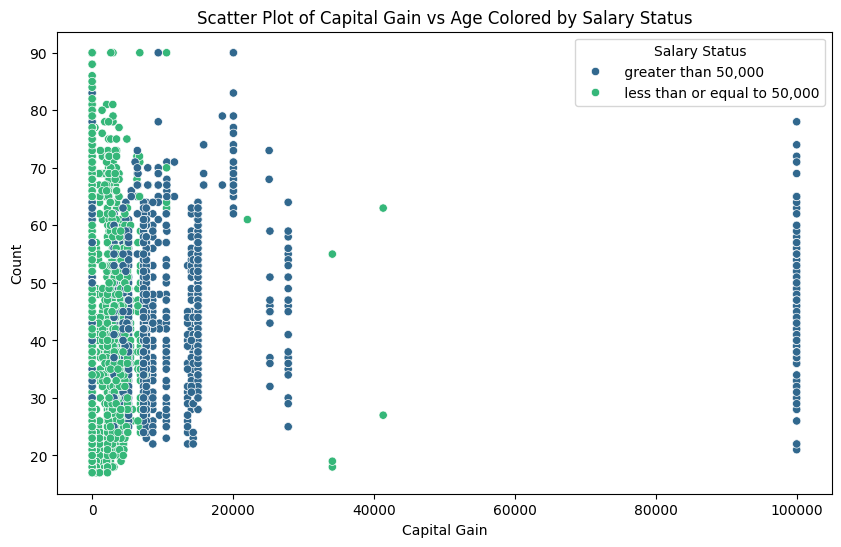

In [ ]:
# Ensure the 'SalStat' column is categorical
data2['SalStat'] = data2['SalStat'].astype('category')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capitalgain', y='age', hue='SalStat', data=data2, palette='viridis')

# Add labels and title
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.title('Scatter Plot of Capital Gain vs Age Colored by Salary Status')
plt.legend(title='Salary Status')

# Show the plot
plt.show()

<ipython-input-419-f0219d43baae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].astype('category')


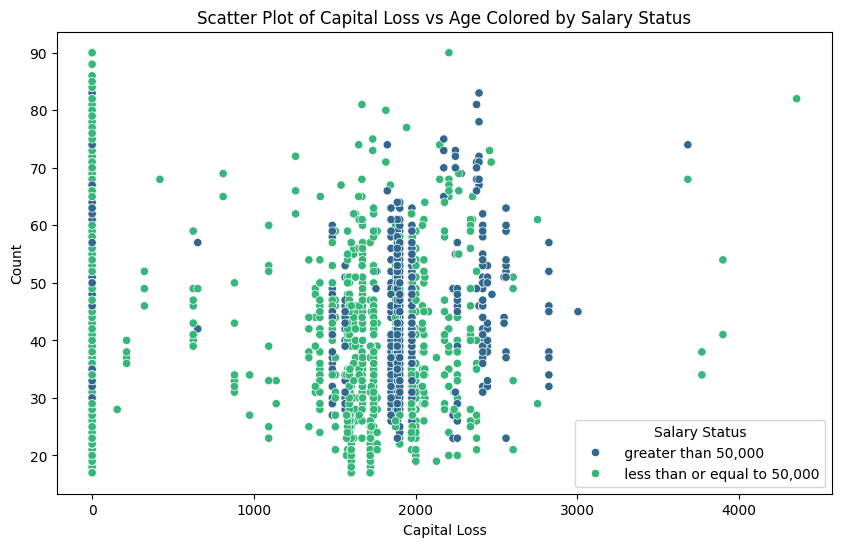

In [ ]:
# Ensure the 'SalStat' column is categorical
data2['SalStat'] = data2['SalStat'].astype('category')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capitalloss', y='age', hue='SalStat', data=data2, palette='viridis')

# Add labels and title
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.title('Scatter Plot of Capital Loss vs Age Colored by Salary Status')
plt.legend(title='Salary Status')

# Show the plot
plt.show()

**so from the histograms and scatter plot we can see that people with non zero captal gains mostly fall in greater than 50k SalStat, howevr for Capital Loss we do not see a clear pattern.**

**Since most people have zero capital loss and not clear pattern, we can drop Capital Loss**


# ***LOGISTIC REGRESSION***
# **(with all features)**

logistic regression does not work with categorical values so converting them into numeric values.


re-indexing the salary status names to 0 and 1 that is less that 50k as 0 and greater than 50k as 1.

In [ ]:
data3  = data.dropna(axis= 0)

In [ ]:
unique_values = data3['SalStat'].unique()
print(unique_values)

[' less than or equal to 50,000' ' greater than 50,000']


UING INTEGER ENCODING

In [ ]:
data3['SalStat'] = data3['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})

<ipython-input-422-7a0cfb0b7171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['SalStat'] = data3['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})


**jobType has several different categories so let us do "one hot encoding" in order to convert them into 0 and 1. Bascially because of one hot encoding, each category in jobtype will be converted into a column containing either 0 or 1.**

In [ ]:
print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [ ]:
new_data = pd.get_dummies(data3, drop_first=True)

In [ ]:
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


storing the column names and removing the input features from the data

In [ ]:
columns_list = list(new_data.columns)
# Remove 'SalStat' from the list of columns if it exists
features = list(set(columns_list) - set(['SalStat']))

In [ ]:
# Print the number of columns in 'columns_list' and 'features'
print("Number of columns in columns_list:", len(columns_list))
print("Number of columns in features:", len(features))


Number of columns in columns_list: 95
Number of columns in features: 94


defining the dependent and independent variables

In [ ]:
y = new_data['SalStat'].values
x = new_data[features].values

In [ ]:
print(x)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
x = x.astype(int)

In [ ]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
x.shape

(30162, 94)

In [ ]:
print(y)

[0 0 1 ... 0 0 0]


In [ ]:
y.shape

(30162,)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
logistic= LogisticRegression()

In [ ]:
logistic.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
##to see the coefficient values
logistic.coef_

#to see the intercept values
logistic.intercept_

array([-1.04046403])

accuracy

In [ ]:
prediction =logistic.predict(test_x)
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8364460161343795


In [ ]:
print(accuracy_score)

0.8364460161343795


confusion matrix

In [ ]:
confusion_matrix = confusion_matrix(test_y, prediction)

In [ ]:
print(confusion_matrix)

[[6293  530]
 [ 950 1276]]


In [ ]:
print(('missclassified samples: %d' % (test_y != prediction).sum()))

missclassified samples: 1480


# ***LOGISTIC REGRESSION***
# **(with less features)**

**Removing the unncessary variables**

In [ ]:
data4  = data.dropna(axis= 0)
data4['SalStat'] = data4['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})


cols = ['gender', 'nativecountry','race', 'capitalloss']
new_data = data4.drop(cols, axis =1)

<ipython-input-444-49c8154d823a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['SalStat'] = data4['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})


**doing one hot encoding and getting target variable and Features for the ML model**

In [ ]:
new_data = pd.get_dummies(new_data, drop_first = True)
columns_list = list(new_data.columns)

features = list(set(columns_list)-set(['SalStat']))
x = new_data[features].values
y = new_data['SalStat'].values

**getting train and test data and executing logistic regression**

In [ ]:
train_x, test_x, train_y, test_y =train_test_split(x,y, test_size = 0.3, random_state = 0)
logistic = LogisticRegression()
logistic.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score


prediction = logistic.predict(test_x)
accuracy = accuracy_score(test_y, prediction)  # Use a different variable name (e.g., 'accuracy')
print(f"Accuracy score: {accuracy:.2f}")

misclassified_samples = (test_y != prediction).sum()
print(f"Misclassified samples: {misclassified_samples}")


Accuracy score: 0.83
Misclassified samples: 1499


**so there is no significant improvement in accuracy, hence let us try another classification algo., called CNN**

# KNN
# **(with less features)** and n = 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

KNN_Classifier = KNeighborsClassifier(n_neighbors = 5)
KNN_Classifier.fit(train_x, train_y)

prediction = KNN_Classifier.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix = confusion_matrix(test_y, prediction)
print("confusion_matrix:", confusion_matrix)


accuracy = accuracy_score(test_y, prediction)
print(accuracy)

misclassified_samples = (test_y != prediction).sum()
print(f"Misclassified samples: {misclassified_samples}")

confusion_matrix: [[6158  665]
 [ 876 1350]]
0.8297049397723505
Misclassified samples: 1541


# instead of 5 finding the misclassification rate for different number of neighbrs.

In [ ]:
Misclassified_sample = []
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(train_x, train_y)
  pred_i = knn.predict(test_x)
  Misclassified_sample.append((test_y != pred_i).sum())



In [ ]:
print(Misclassified_sample)

[1858, 1609, 1622, 1533, 1541, 1501, 1528, 1540, 1546, 1535, 1518, 1527, 1515, 1496, 1513, 1509, 1506, 1482, 1514, 1476]


so the least no. of misclassified samples are observed for n = 20

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

KNN_Classifier = KNeighborsClassifier(n_neighbors = 20)
KNN_Classifier.fit(train_x, train_y)

prediction = KNN_Classifier.predict(test_x)

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix = confusion_matrix(test_y, prediction)
print("confusion_matrix:", confusion_matrix)


accuracy = accuracy_score(test_y, prediction)
print(accuracy)

misclassified_samples = (test_y != prediction).sum()
print(f"Misclassified samples: {misclassified_samples}")

confusion_matrix: [[6396  427]
 [1049 1177]]
0.8368880539286109
Misclassified samples: 1476


# Earlier we had tried KNN with 4 less features, Let us try KNN with all the features

In [ ]:
data5  = data.dropna(axis= 0)
data5['SalStat'] = data5['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})


new_data = pd.get_dummies(data5, drop_first = True)
columns_list = list(new_data.columns)

features = list(set(columns_list)-set(['SalStat']))
x = new_data[features].values
y = new_data['SalStat'].values

train_x, test_x, train_y, test_y =train_test_split(x,y, test_size = 0.3, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Misclassified_sample = []
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(train_x, train_y)
  pred_i = knn.predict(test_x)
  Misclassified_sample.append((test_y != pred_i).sum())

print(Misclassified_sample)

<ipython-input-453-7ed162d04827>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['SalStat'] = data5['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})


[1766, 1516, 1522, 1437, 1455, 1455, 1456, 1452, 1481, 1432, 1465, 1446, 1451, 1435, 1421, 1415, 1435, 1423, 1443, 1429]


again lowest misclassification rate is obtained for n = 20

In [ ]:
data5  = data.dropna(axis= 0)
data5['SalStat'] = data5['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})


#cols = ['gender', 'nativecountry','race', 'maritalstatus', 'JobType', 'hoursperweek']
#new_data = data5.drop(cols, axis =1)

new_data = pd.get_dummies(data5, drop_first = True)
columns_list = list(new_data.columns)

features = list(set(columns_list)-set(['SalStat']))
x = new_data[features].values
y = new_data['SalStat'].values

train_x, test_x, train_y, test_y =train_test_split(x,y, test_size = 0.3, random_state = 0)


from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

KNN_Classifier = KNeighborsClassifier(n_neighbors = 20)
KNN_Classifier.fit(train_x, train_y)

prediction = KNN_Classifier.predict(test_x)

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix = confusion_matrix(test_y, prediction)
print("confusion_matrix:", confusion_matrix)


accuracy = accuracy_score(test_y, prediction)
print(accuracy)

misclassified_samples = (test_y != prediction).sum()
print(f"Misclassified samples: {misclassified_samples}")

<ipython-input-454-d0464bd6c685>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['SalStat'] = data5['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})


confusion_matrix: [[6398  425]
 [1004 1222]]
0.84208199801083
Misclassified samples: 1429


# So the highest accuracy is observed for KNN with n = 20, with all the available features that is 84.7%. However even with lesser features the accuracy is 83.6%. The difference could be because of the loss of some of the information becuase of removal of featues.

# Since the accuracy are almost the same with and without lesser features, we can use the KNN MODEL with n=20 and lesser features for prediting the salary status of individuals and avoid misuse of susbsidies.